In [1]:
import sklearn
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris = load_iris()

In [3]:
X = iris['data']

In [4]:
import matplotlib.pyplot as plt
import numpy as np


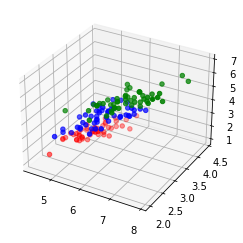

In [5]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(projection='3d')


colors = {0:'red', 1:'blue', 2:'green'}
color_map = [colors[target] for target in iris.target]

xs = X[:, 0]
ys = X[:, 1]
zs = X[:, 2]
ax.scatter(xs, ys, zs, c=color_map)

In [6]:
class myPCA:
    
    def __init__(self, n_components : int = 2, method : str = 'svd'):
        '''
            The constructor of the PCA algorithm.
        :param n_components: int, defailt = 2
            The dimesion in which the data will be reduced.
        :param method: str, default = 'svd'
            The way used by PCA to reduce the dimensionality of the data
        '''
        self.__n_components = n_components
        if method in ['svd', 'eigen']:
            self.__method = method
        else:
            raise ValueError(f"'{method}' isn't a method implemented in this model ")

    def fit(self, X: 'np.array'):
        '''
            The fitting method
        :param X: np.array
            The data on which we want to fit the pca
        '''
        if self.__method == 'svd':
            U, S, V = np.linalg.svd(X)
            self.__V = V[:self.__n_components, :]
        elif self.__method == 'eigen':
            corr_mat = np.corrcoef(X.T)
            
            # Getting the eigenvectors and eigenvalues
            self.eig_vals, self.eig_vecs = np.linalg.eig(corr_mat)
            
            # Sorting the list of tuples (eigenvalue, eigenvector)
            self.eig_pairs = [(np.abs(self.eig_vals[i]), self.eig_vecs[:, i])
                             for i in range(len(self.eig_vals))]
            self.eig_pairs.sort(key=lambda x: x[0], reverse=True)
            
            # Calculating the exmplainet ration
            total = sum(self.eig_vals)
            self.explained_varianve_ration = [(i/total) * 100 
                                             for i in sorted(self.eig_vals, reverse=True)]
            self.cumulative_variance_ration = np.cumsum(
                self.explained_varianve_ration
            )
            # Creating the projection matrix
            self.matrix_w = np.hstack(
                    (self.eig_pairs[i][1].reshape(np.size(X,1), 1) 
                    for i in range(self.__n_components))
            )
        return self
    
    def transform(self, X:'np.array') -> 'np.array':
        '''
            The transform function.
        :param X: np.array
            The data that we must reduce.
        '''
        if self.__method == 'svd':
            return X.dot(self.__V.T)
        elif self.__method == 'eigen':
            return X.dot(self.matrix_w)

In [20]:
pca_eigen = myPCA(n_components=2, method= 'eigen')
pca_svd = myPCA(n_components=2, method= 'svd')

In [21]:

# import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [22]:
# 6 Create an instance of sklearn and implement a PCA algorithm.
pca=PCA(n_components=2)

# 7 Apply StandardScaler from sklearn on the data.
scaling = StandardScaler()
scaling.fit(X)

Scaled_data=scaling.transform(X)

In [25]:
# 8 Train all created instances of PCA on the iris data.
pca.fit(Scaled_data)
pca_X =pca.transform(Scaled_data)

# Fiting pca_eigen algoritm 
pca_eigen.fit(Scaled_data)
pca_eigen_X = pca_eigen.transform(Scaled_data)
# Fiting pca_svd algoritm
pca_svd.fit(Scaled_data)
pca_svd_X = pca_svd.transform(Scaled_data)


/tmp/ipykernel_4850/3007672102.py:45: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  self.matrix_w = np.hstack(


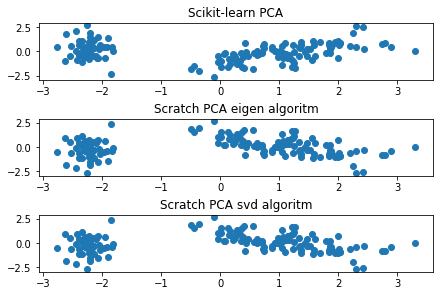

In [43]:
fig, axs = plt.subplots(3, 1, constrained_layout=True)
axs[0].scatter(pca_X[:, 0], pca_X[:, 1])
axs[0].set_title('Scikit-learn PCA')

axs[1].scatter(pca_eigen_X[:, 0], pca_eigen_X[:, 1])
axs[1].set_title('Scratch PCA eigen algoritm')

axs[2].scatter(pca_svd_X[:, 0], pca_svd_X[:, 1])
axs[2].set_title('Scratch PCA svd algoritm')

plt.show()

Concluzie:
In graficul 3D de mai sus este mai greu de determinat categoria elementului.

In graficele obtinute in urma utilizarii PCA se poate clar de distins o clasa, in schimb cele 2 clase sunt mai greu de identificat

In [55]:
# 12 Retrain a sklearn PCA model on the iris data set with n_components set to 1.
pca=PCA(n_components=1)

In [56]:
pca.fit(Scaled_data)
pca_one = pca.transform(Scaled_data)

In [57]:
explained_variance_ratio = pca.explained_variance_ratio_

In [58]:
explained_variance_ratio

array([0.72962445])

In [59]:
# Nu inteleg cum sa fac un plot de o linie avand doar o valoare;